In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [27]:
! ls ../Datasets/


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [28]:
data = pd.read_csv('C:/Users/subar/Downloads/GitHub/cmpe255_Project/Cmpe255_Project/Datasets/AirQuality/AQData_monthly_2014_2019.csv', low_memory =False)

In [29]:
data.head()

,AirQualityIndex,Year,MonthNo,MonthName,Zone,Station,Value
0,aqi,2014,1,Jan,Northern Zone,Forest Knolls,0.0
1,aqi,2014,2,Feb,Northern Zone,Forest Knolls,0.0
2,aqi,2014,3,Mar,Northern Zone,Forest Knolls,0.0
3,aqi,2014,4,Apr,Northern Zone,Forest Knolls,0.0
4,aqi,2014,5,May,Northern Zone,Forest Knolls,0.0


In [30]:
zone = data['Zone'].unique()
zone.sort()
print(len(zone))
zone

5


array(['Coast & Central Bay', 'Eastern Zone', 'Northern Zone',
       'Santa Clara Valley', 'South Central Bay'], dtype=object)

In [31]:
data.head()

,AirQualityIndex,Year,MonthNo,MonthName,Zone,Station,Value
0,aqi,2014,1,Jan,Northern Zone,Forest Knolls,0.0
1,aqi,2014,2,Feb,Northern Zone,Forest Knolls,0.0
2,aqi,2014,3,Mar,Northern Zone,Forest Knolls,0.0
3,aqi,2014,4,Apr,Northern Zone,Forest Knolls,0.0
4,aqi,2014,5,May,Northern Zone,Forest Knolls,0.0


In [32]:
filtered_zonedata = data[(data['Zone'].isin(['Northern Zone']))] # & (data['Year'].isin(['2016']))
filtered_zonedata.head()

,AirQualityIndex,Year,MonthNo,MonthName,Zone,Station,Value
0,aqi,2014,1,Jan,Northern Zone,Forest Knolls,0.0
1,aqi,2014,2,Feb,Northern Zone,Forest Knolls,0.0
2,aqi,2014,3,Mar,Northern Zone,Forest Knolls,0.0
3,aqi,2014,4,Apr,Northern Zone,Forest Knolls,0.0
4,aqi,2014,5,May,Northern Zone,Forest Knolls,0.0


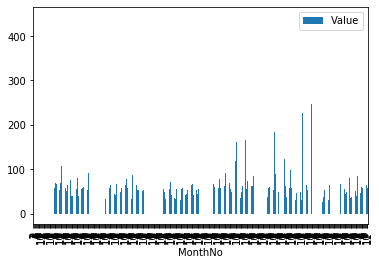

In [33]:
#histogram for zonal AQ value to understand trend

filtered_zonedata.plot(x="MonthNo", y=["Value", "Station"], kind="bar")
plt.show()

In [34]:
filtered_zonedata["NewMonth"] = filtered_zonedata["Year"].astype(str).map(str) +"-" +filtered_zonedata["MonthNo"].astype(str)
filtered_zonedata.head()
filtered_zonedata

c:\users\subar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,AirQualityIndex,Year,MonthNo,MonthName,Zone,Station,Value,NewMonth
0,aqi,2014,1,Jan,Northern Zone,Forest Knolls,0.0,2014-1
1,aqi,2014,2,Feb,Northern Zone,Forest Knolls,0.0,2014-2
2,aqi,2014,3,Mar,Northern Zone,Forest Knolls,0.0,2014-3
3,aqi,2014,4,Apr,Northern Zone,Forest Knolls,0.0,2014-4
4,aqi,2014,5,May,Northern Zone,Forest Knolls,0.0,2014-5
...,...,...,...,...,...,...,...,...
1876,aqi,2019,7,Jul,Northern Zone,Vallejo,57.0,2019-7
1877,aqi,2019,8,Aug,Northern Zone,Vallejo,62.0,2019-8
1878,aqi,2019,9,Sep,Northern Zone,Vallejo,47.0,2019-9
1879,aqi,2019,10,Oct,Northern Zone,Vallejo,64.0,2019-10


In [35]:
#setting the new month as index
filtered_zonedata.NewMonth = pd.to_datetime(filtered_zonedata["NewMonth"])
filtered_zonedata.set_index('NewMonth', inplace=True)

In [18]:
filtered_zonedata.head()

,AirQualityIndex,Year,MonthNo,MonthName,Zone,Station,Value,County
NewMonth,,,,,,,,
2014-01-01,aqi,2014,1,Jan,Northern Zone,Forest Knolls,0.0,Marin
2014-02-01,aqi,2014,2,Feb,Northern Zone,Forest Knolls,0.0,Marin
2014-03-01,aqi,2014,3,Mar,Northern Zone,Forest Knolls,0.0,Marin
2014-04-01,aqi,2014,4,Apr,Northern Zone,Forest Knolls,0.0,Marin
2014-05-01,aqi,2014,5,May,Northern Zone,Forest Knolls,0.0,Marin


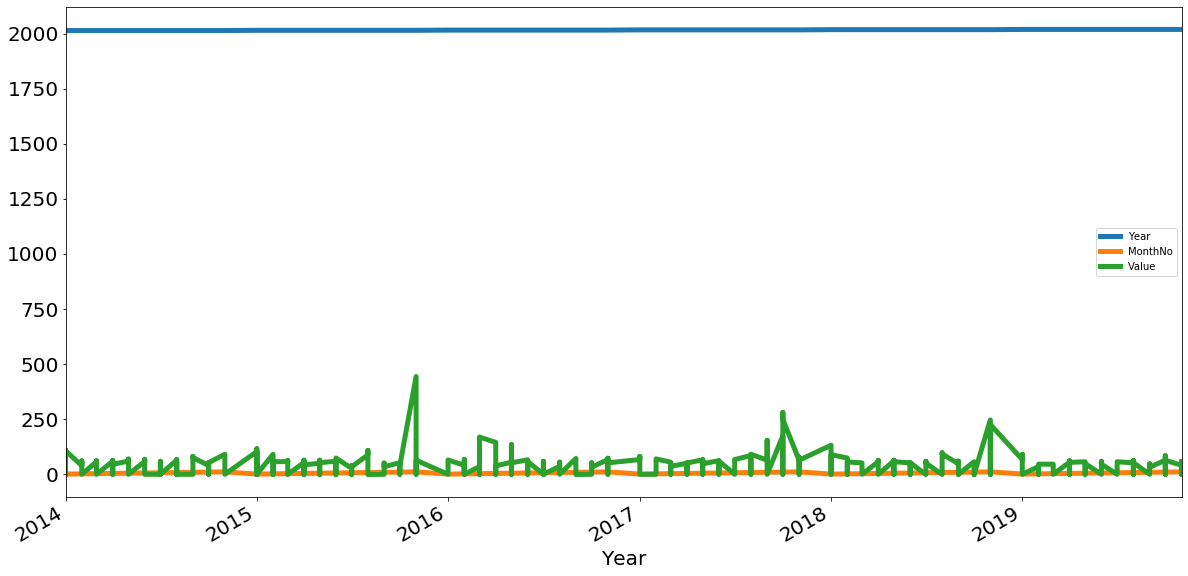

In [36]:
filtered_zonedata.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

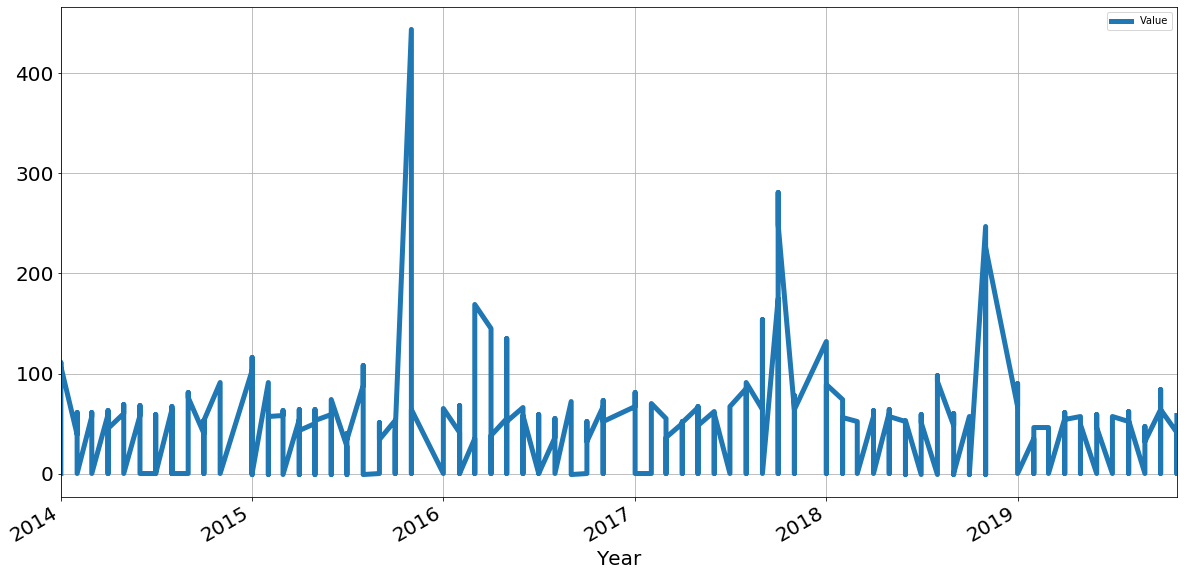

In [37]:
filtered_zonedata[['Value']].plot(figsize=(20,10), linewidth=5, fontsize=20, grid=True)
plt.xlabel('Year', fontsize=20);

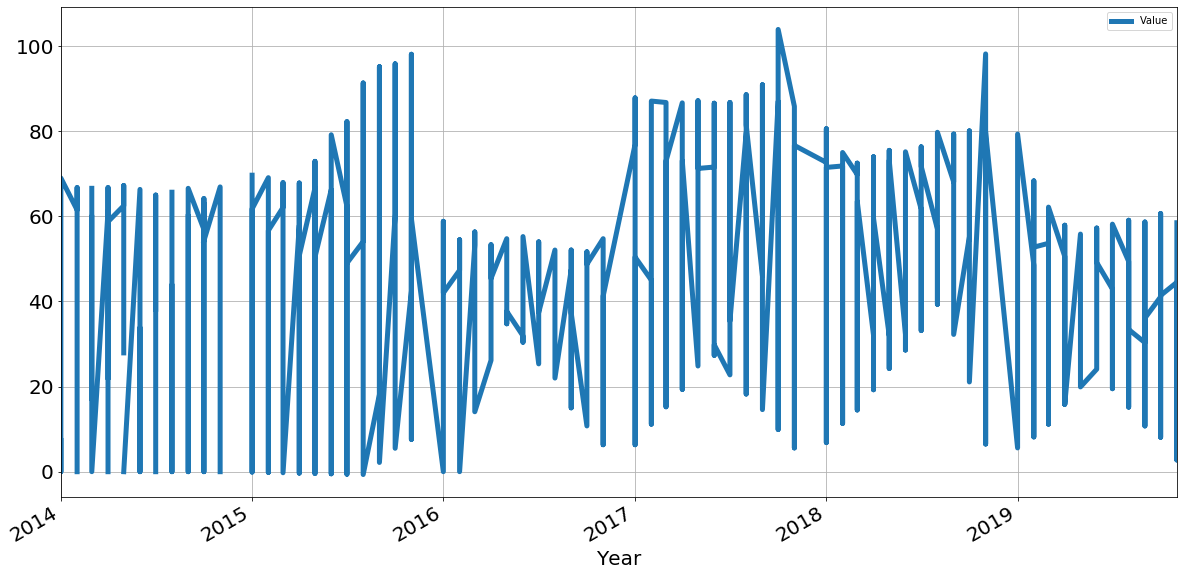

In [38]:
value = filtered_zonedata[['Value']]
value.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20, grid=True)
plt.xlabel('Year', fontsize=20);

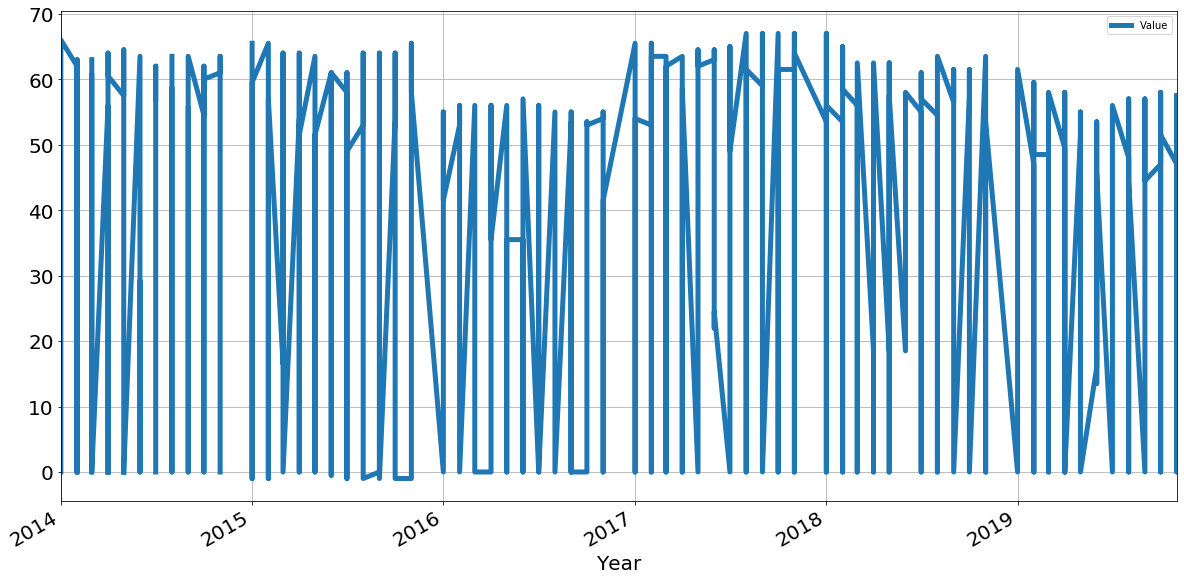

In [39]:
value = filtered_zonedata[['Value']]
value.rolling(12).median().plot(figsize=(20,10), linewidth=5, fontsize=20, grid=True)
plt.xlabel('Year', fontsize=20);

In [40]:
station = data['Station'].unique()
station.sort()
print(len(station))
station

32


array(['Berkeley Aquatic Park', 'Bethel Island', 'Concord',
       'Crockett - Kendall Ave.', 'Fairfield - Chadbourne Rd.',
       'Forest Knolls', 'Gilroy', 'Hayward', 'Laney College',
       'Livermore - Rincon Ave.', 'Los Gatos', 'Martinez - Jones St.',
       'Napa', 'Napa - Napa Valley College', 'Oakland East',
       'Oakland West', 'Pittsburg - Loveridge', 'Pleasanton',
       'Pleasanton - Owens Ct.', 'Pt. Richmond', 'Redwood City',
       'Richmond - 7th. St.', 'Rodeo', 'San Francisco - Arkansas St.',
       'San Jose - Jackson St.', 'San Jose - Knox Ave.',
       'San Martin - Airport', 'San Pablo - Rumrill', 'San Rafael',
       'San Ramon', 'Sebastopol', 'Vallejo'], dtype=object)

In [41]:
data['ZoneCode'] = data['Zone'].astype('category').cat.codes
data['ZoneCode']

0       2
1       2
2       2
3       2
4       2
       ..
2173    3
2174    3
2175    3
2176    3
2177    3
Name: ZoneCode, Length: 2178, dtype: int8

In [42]:
data['StationCode'] = data['Station'].astype('category').cat.codes
data['StationCode']

0        5
1        5
2        5
3        5
4        5
        ..
2173    26
2174    26
2175    26
2176    26
2177    26
Name: StationCode, Length: 2178, dtype: int8

In [43]:
zstation_fields = ['ZoneCode','StationCode','Value','MonthNo']
d = data[zstation_fields].groupby(['ZoneCode','StationCode'], as_index=False).mean()

In [44]:
d

,ZoneCode,StationCode,Value,MonthNo
0,0,0,41.045455,6
1,0,3,0.000000,6
2,0,8,69.333333,6
3,0,14,65.909091,6
4,0,15,71.939394,6
5,0,19,0.000000,6
6,0,21,0.000000,6
7,0,22,0.000000,6
8,0,23,66.772727,6
9,0,27,69.121212,6


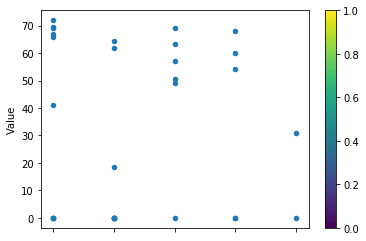

In [45]:
d.plot.scatter(x='ZoneCode', y='Value',
...                       colormap='viridis')


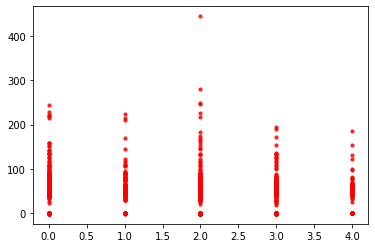

In [46]:
_,ax = plt.subplots()
ax.scatter(data['ZoneCode'], data['Value'], s=10, color="r", alpha=0.8)

In [56]:
county_station = pd.read_csv('../Datasets/county_station.csv',low_memory=False)
county_station.head()

,No,Station,County
0,1,Berkeley Aquatic Park,Alameda
1,2,Bethel Island,Contra Costa
2,3,Concord,Contra Costa
3,4,Crockett - Kendall Ave.,Houston
4,5,Fairfield - Chadbourne Rd.,Solano


In [99]:
merged = pd.merge(data,county_station, on='Station')


In [100]:
merged['County'].unique()

array(['Marin', 'Napa', 'Sonoma', 'Solano', 'Alameda', 'Houston',
       'Contra Costa', 'San Francisco', 'Santa Clara'], dtype=object)

In [101]:
merged['Station'].unique()

array(['Forest Knolls', 'Napa - Napa Valley College', 'Napa',
       'San Rafael', 'Sebastopol', 'Vallejo', 'Berkeley Aquatic Park',
       'Crockett - Kendall Ave.', 'Laney College', 'Oakland East',
       'Oakland West', 'Pt. Richmond', 'Richmond - 7th. St.', 'Rodeo',
       'San Francisco - Arkansas St.', 'San Pablo - Rumrill',
       'Bethel Island', 'Concord', 'Fairfield - Chadbourne Rd.',
       'Livermore - Rincon Ave.', 'Martinez - Jones St.', 'Pleasanton',
       'Pleasanton - Owens Ct.', 'San Ramon', 'Hayward', 'Gilroy',
       'Los Gatos', 'San Jose - Jackson St.', 'San Jose - Knox Ave.',
       'San Martin - Airport'], dtype=object)

In [60]:
len(county_station['Station'].unique())

32

In [ ]:
##now county wise trend check to drop stations and to identify metric for that

In [102]:
merged.head()

,AirQualityIndex,Year,MonthNo,MonthName,Zone,Station,Value,ZoneCode,StationCode,No,County
0,aqi,2014,1,Jan,Northern Zone,Forest Knolls,0.0,2,5,6,Marin
1,aqi,2014,2,Feb,Northern Zone,Forest Knolls,0.0,2,5,6,Marin
2,aqi,2014,3,Mar,Northern Zone,Forest Knolls,0.0,2,5,6,Marin
3,aqi,2014,4,Apr,Northern Zone,Forest Knolls,0.0,2,5,6,Marin
4,aqi,2014,5,May,Northern Zone,Forest Knolls,0.0,2,5,6,Marin


In [103]:
#filter data for one station to identify trend
filtered_stationdata = merged

In [104]:
#contacting month+year
filtered_stationdata["NewMonth"] = filtered_stationdata["Year"].astype(str).map(str) +"-" +filtered_stationdata["MonthNo"].astype(str)
filtered_stationdata.head()
filtered_stationdata

,AirQualityIndex,Year,MonthNo,MonthName,Zone,Station,Value,ZoneCode,StationCode,No,County,NewMonth
0,aqi,2014,1,Jan,Northern Zone,Forest Knolls,0.0,2,5,6,Marin,2014-1
1,aqi,2014,2,Feb,Northern Zone,Forest Knolls,0.0,2,5,6,Marin,2014-2
2,aqi,2014,3,Mar,Northern Zone,Forest Knolls,0.0,2,5,6,Marin,2014-3
3,aqi,2014,4,Apr,Northern Zone,Forest Knolls,0.0,2,5,6,Marin,2014-4
4,aqi,2014,5,May,Northern Zone,Forest Knolls,0.0,2,5,6,Marin,2014-5
...,...,...,...,...,...,...,...,...,...,...,...,...
1975,aqi,2019,7,Jul,Santa Clara Valley,San Martin - Airport,0.0,3,26,27,Marin,2019-7
1976,aqi,2019,8,Aug,Santa Clara Valley,San Martin - Airport,0.0,3,26,27,Marin,2019-8
1977,aqi,2019,9,Sep,Santa Clara Valley,San Martin - Airport,0.0,3,26,27,Marin,2019-9
1978,aqi,2019,10,Oct,Santa Clara Valley,San Martin - Airport,0.0,3,26,27,Marin,2019-10


In [105]:
filtered_stationdata.NewMonth = pd.to_datetime(filtered_stationdata["NewMonth"])
filtered_stationdata.set_index('NewMonth', inplace=True)

In [106]:
merged['Station'].unique()

array(['Forest Knolls', 'Napa - Napa Valley College', 'Napa',
       'San Rafael', 'Sebastopol', 'Vallejo', 'Berkeley Aquatic Park',
       'Crockett - Kendall Ave.', 'Laney College', 'Oakland East',
       'Oakland West', 'Pt. Richmond', 'Richmond - 7th. St.', 'Rodeo',
       'San Francisco - Arkansas St.', 'San Pablo - Rumrill',
       'Bethel Island', 'Concord', 'Fairfield - Chadbourne Rd.',
       'Livermore - Rincon Ave.', 'Martinez - Jones St.', 'Pleasanton',
       'Pleasanton - Owens Ct.', 'San Ramon', 'Hayward', 'Gilroy',
       'Los Gatos', 'San Jose - Jackson St.', 'San Jose - Knox Ave.',
       'San Martin - Airport'], dtype=object)

In [107]:
merged['County'].unique()

array(['Marin', 'Napa', 'Sonoma', 'Solano', 'Alameda', 'Houston',
       'Contra Costa', 'San Francisco', 'Santa Clara'], dtype=object)

In [118]:
filtered_stationdata = merged.groupby(['AirQualityIndex','Year','Zone','MonthNo','County'], as_index=False)['Value'].median()

In [119]:
#filter data for one station to identify trend
filtered_stationdata = merged[(merged['County'].isin(['Napa']))] # & (data['Year'].isin(['2016']))
filtered_stationdata.head()

,AirQualityIndex,Year,MonthNo,MonthName,Zone,Station,Value,ZoneCode,StationCode,No,County
NewMonth,,,,,,,,,,,
2014-01-01,aqi,2014,1,Jan,Northern Zone,Napa - Napa Valley College,0.0,2,13,14,Napa
2014-02-01,aqi,2014,2,Feb,Northern Zone,Napa - Napa Valley College,0.0,2,13,14,Napa
2014-03-01,aqi,2014,3,Mar,Northern Zone,Napa - Napa Valley College,0.0,2,13,14,Napa
2014-04-01,aqi,2014,4,Apr,Northern Zone,Napa - Napa Valley College,0.0,2,13,14,Napa
2014-05-01,aqi,2014,5,May,Northern Zone,Napa - Napa Valley College,0.0,2,13,14,Napa


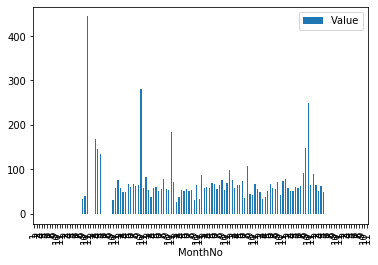

In [120]:
#histogram for zonal AQ value to understand trend

filtered_stationdata.plot(x="MonthNo", y=["Value", "Station"], kind="bar")
plt.show()

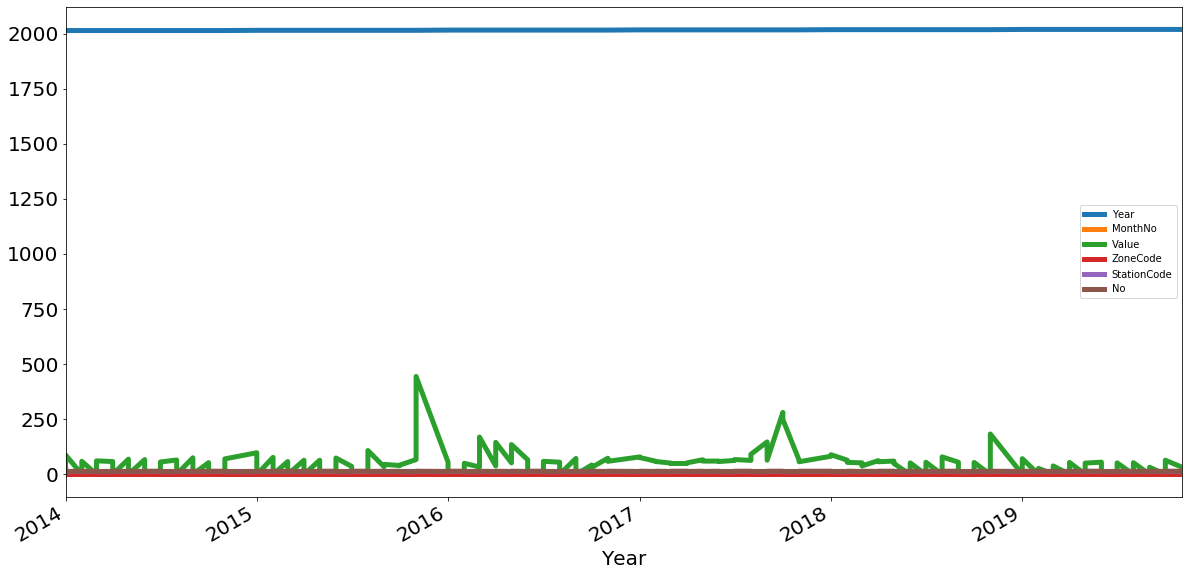

In [121]:
filtered_stationdata.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

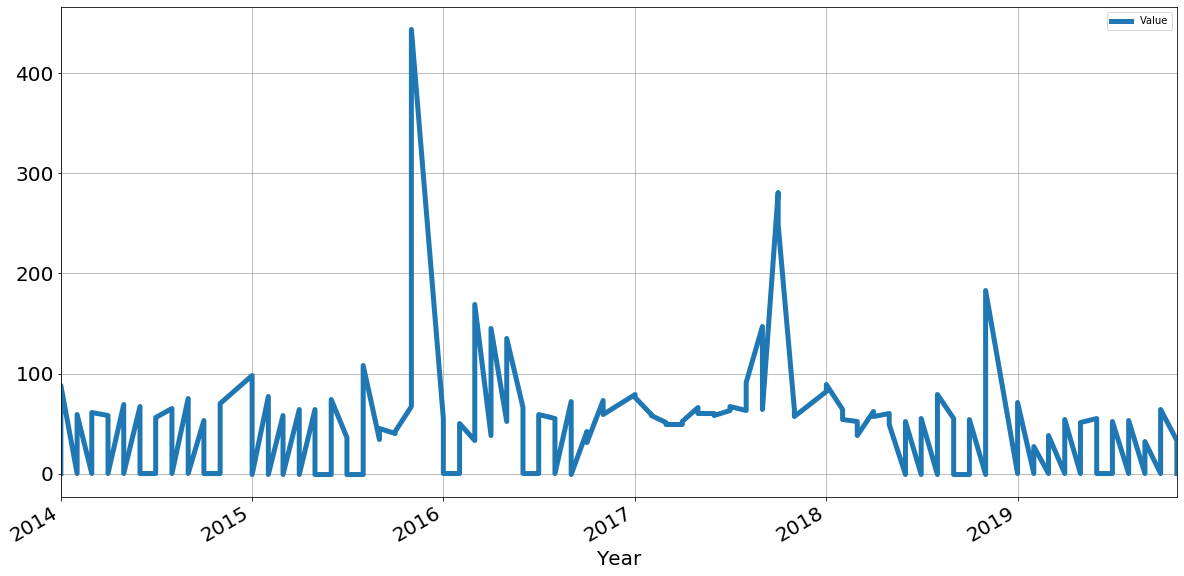

In [122]:
filtered_stationdata[['Value']].plot(figsize=(20,10), linewidth=5, fontsize=20, grid=True)
plt.xlabel('Year', fontsize=20);

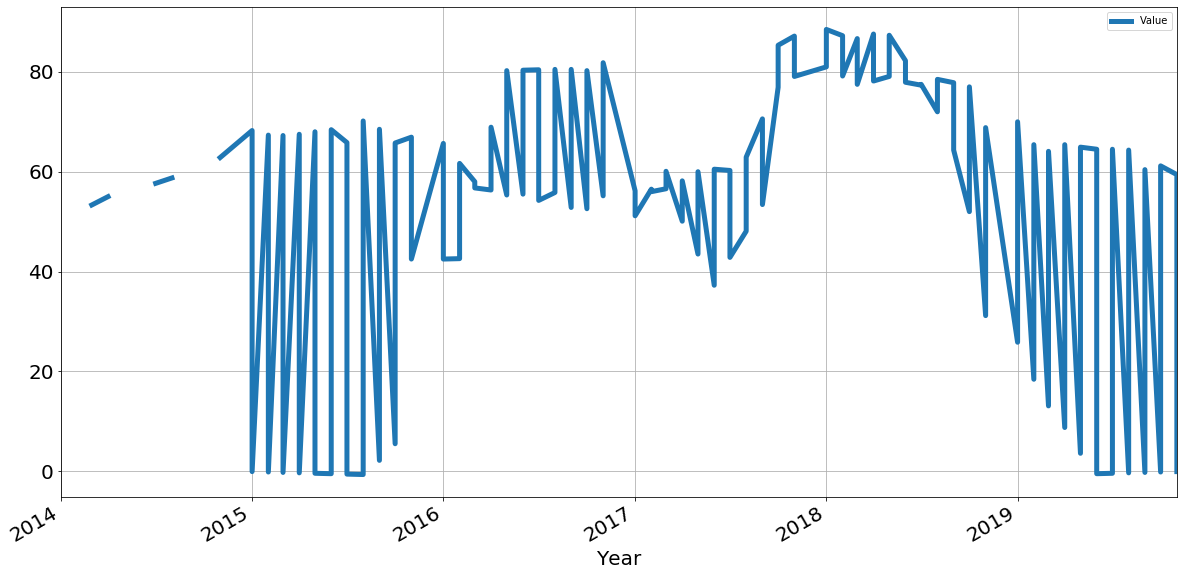

In [123]:
value = filtered_stationdata[['Value']]
value.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20, grid=True)
plt.xlabel('Year', fontsize=20);

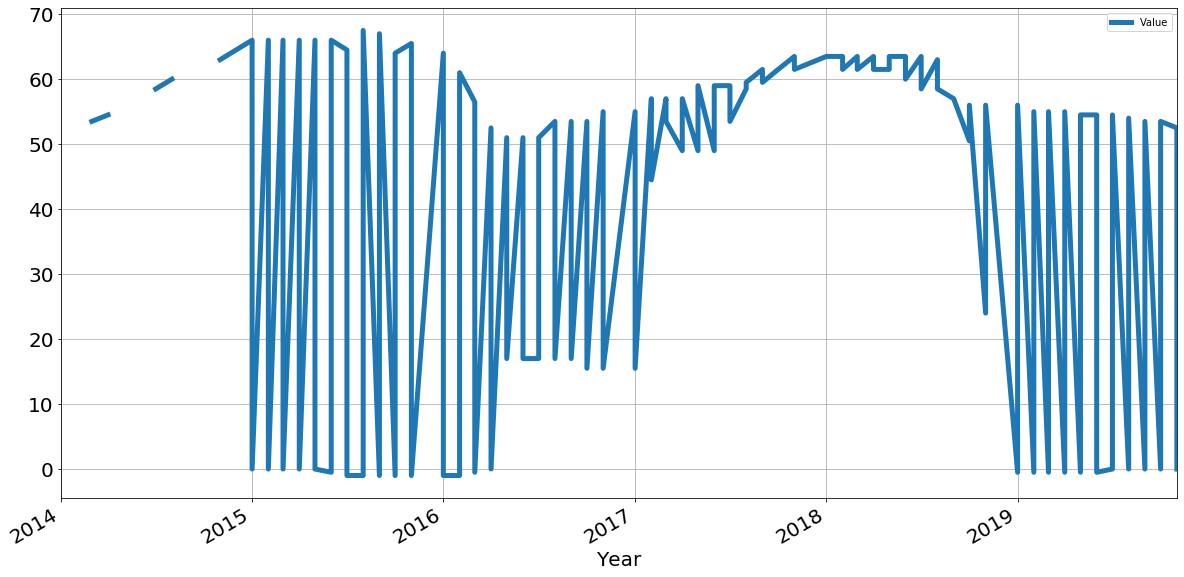

In [124]:
value = filtered_stationdata[['Value']]
value.rolling(12).median().plot(figsize=(20,10), linewidth=5, fontsize=20, grid=True)
plt.xlabel('Year', fontsize=20);